# Project_1: How debts impact people's lives and their status of loan based on personal parameters.

* Loan_dataset & debt_ impact EDA 

In [30]:
#import all required dependencies for this EDA project:

import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')


In [31]:
# accessing the stored csv file path and read the data:
file_path_1 = Path("data/LoanDataset - LoansDatasest.csv") #this is the larger csv file.
file_path_2 = Path("data/debt_impact_data (2).csv") # this is the smaller csv file.

#reading the csv file:
loan_df = pd.read_csv(file_path_1)
impact_df = pd.read_csv(file_path_2)

In [32]:
# checking:
loan_df.head() #notice this is from UK for the pounds

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [33]:
impact_df.head() # this is from US.

,gender,age,profession,occupation,country_of_residence,urban_rural,owns_car,salary,cost_of_living,marital_status,has_kids,num_kids,debt_type,debt_amount,monthly_debt_payment,savings
0,Male,27,Marketing Specialist,Full-Time,United States,Urban,Yes (Loan),42929,Medium,Single,No,0,Student Loan,41999,5946,11612
1,Female,40,Pilot,Full-Time,United States,Rural,Yes (Loan),69733,High,Single,Yes,1,Student Loan,39599,4459,16244
2,Female,40,Writer,Full-Time,United States,Rural,Yes (Owned),116838,High,Single,No,1,Student Loan,38987,4953,10657
3,Female,37,Writer,Full-Time,United States,Rural,No,49245,High,Married,No,0,Student Loan,27108,735,12349
4,Male,23,Musician,Full-Time,United States,Rural,Yes (Loan),45168,Medium,Married,No,0,Student Loan,23551,6588,19260


In [34]:
loan_df.describe() # we can see some columns dtypes need to be changed.

,customer_id,customer_age,employment_duration,loan_int_rate,term_years,cred_hist_length
count,32583.000000,32586.000000,31691.000000,29470.000000,32586.000000,32586.000000
mean,16289.497806,27.732769,4.790161,11.011553,4.761738,5.804026
std,9405.919628,6.360528,4.142746,3.240440,2.471107,4.055078
min,1.000000,3.000000,0.000000,5.420000,1.000000,2.000000
25%,8144.500000,23.000000,2.000000,7.900000,3.000000,3.000000
50%,16288.000000,26.000000,4.000000,10.990000,4.000000,4.000000
75%,24433.500000,30.000000,7.000000,13.470000,7.000000,8.000000
max,32581.000000,144.000000,123.000000,23.220000,10.000000,30.000000


In [35]:
loan_df.info #checking 

<bound method DataFrame.info of        customer_id  customer_age customer_income home_ownership  \
0              1.0            22           59000           RENT   
1              2.0            21            9600            OWN   
2              3.0            25            9600       MORTGAGE   
3              4.0            23           65500           RENT   
4              5.0            24           54400           RENT   
...            ...           ...             ...            ...   
32581      32577.0            57           53000       MORTGAGE   
32582      32578.0            54          120000       MORTGAGE   
32583      32579.0            65           76000           RENT   
32584      32580.0            56          150000       MORTGAGE   
32585      32581.0            99           42000           RENT   

       employment_duration      loan_intent loan_grade   loan_amnt  \
0                    123.0         PERSONAL          C  £35,000.00   
1                      

In [36]:
loan_df.dtypes # need to change dtypes later.

customer_id            float64
customer_age             int64
customer_income         object
home_ownership          object
employment_duration    float64
loan_intent             object
loan_grade              object
loan_amnt               object
loan_int_rate          float64
term_years               int64
historical_default      object
cred_hist_length         int64
Current_loan_status     object
dtype: object

In [37]:
#check all the NaN 
loan_df.isna().sum() # need to drop NA later.

customer_id                3
customer_age               0
customer_income            0
home_ownership             0
employment_duration      895
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate           3116
term_years                 0
historical_default     20737
cred_hist_length           0
Current_loan_status        4
dtype: int64

In [38]:
# check for duplication:
loan_df.loc[loan_df.duplicated()] # need to get rid of duplicated roles.

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
323,323.0,25,120000,RENT,6.0,MEDICAL,A,"£1,000,000.00",10.74,10,N,2,DEFAULT
325,324.0,23,120000,RENT,7.0,EDUCATION,A,"£25,000.00",9.99,10,NaN,2,NO DEFAULT
14691,14688.0,21,32000,RENT,6.0,PERSONAL,B,"£15,000.00",15.27,1,Y,3,DEFAULT
14692,14689.0,22,38000,RENT,6.0,PERSONAL,A,"£15,000.00",7.88,2,N,3,DEFAULT
30289,30284.0,47,70000,RENT,3.0,HOMEIMPROVEMENT,A,"£6,000.00",8.49,7,N,12,NO DEFAULT
30290,30285.0,44,70000,RENT,15.0,DEBTCONSOLIDATION,A,"£6,000.00",5.79,4,N,16,DEFAULT


In [39]:
loan_df_test = loan_df.copy() #here making a copy of the original df.
loan_df_test = loan_df_test.drop_duplicates() # drop the duplicates on the copied df.

In [40]:
loan_df_test.columns 

Index(['customer_id', 'customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'term_years', 'historical_default', 'cred_hist_length',
       'Current_loan_status'],
      dtype='object')

In [41]:
#tidy up the loan_df_test and reframe the df only contains the wanted columns:
tidy_loan_df = loan_df_test[['customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'term_years','historical_default', 'cred_hist_length',
       'Current_loan_status']]
tidy_loan_df

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...
32581,57,53000,MORTGAGE,1.0,PERSONAL,C,"£5,800.00",13.16,7,NaN,30,NO DEFAULT
32582,54,120000,MORTGAGE,4.0,PERSONAL,A,"£17,625.00",7.49,4,NaN,19,NO DEFAULT
32583,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,"£35,000.00",10.99,5,N,28,DEFAULT
32584,56,150000,MORTGAGE,5.0,PERSONAL,B,"£15,000.00",11.48,6,NaN,26,NO DEFAULT


In [42]:
# same here make the copy of tidy loan df and drop NA.
test_copy = tidy_loan_df.copy()
test_copy = test_copy.dropna(how = 'all')

In [43]:
test_copy.shape

(32580, 12)

In [44]:
test_copy = test_copy.reset_index(drop=True).copy() #reseting the index to make it more readable.
test_copy

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...
32575,57,53000,MORTGAGE,1.0,PERSONAL,C,"£5,800.00",13.16,7,NaN,30,NO DEFAULT
32576,54,120000,MORTGAGE,4.0,PERSONAL,A,"£17,625.00",7.49,4,NaN,19,NO DEFAULT
32577,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,"£35,000.00",10.99,5,N,28,DEFAULT
32578,56,150000,MORTGAGE,5.0,PERSONAL,B,"£15,000.00",11.48,6,NaN,26,NO DEFAULT


In [45]:
# convert dtypes:
test_copy['customer_income'] = test_copy['customer_income'].astype(str)
test_copy['customer_income'] = test_copy['customer_income'].str.strip()
test_copy['customer_income'] = test_copy['customer_income'].str.replace(',', '', regex=False)
test_copy['customer_income'] = pd.to_numeric(test_copy['customer_income']) # convert customer income column data to numeric for later calculation.

test_copy = test_copy.rename(columns={'loan_amnt':'loan_amnt(pounds)'})

test_copy['loan_amnt(pounds)'] = test_copy['loan_amnt(pounds)'].astype(str)
test_copy['loan_amnt(pounds)'] = test_copy['loan_amnt(pounds)'].str.strip()
test_copy['loan_amnt(pounds)'] = test_copy['loan_amnt(pounds)'].str.replace('£', '', regex=False)
test_copy['loan_amnt(pounds)'] = test_copy['loan_amnt(pounds)'].str.replace(',', '', regex=False)

test_copy['loan_amnt(pounds)'] = pd.to_numeric(test_copy['loan_amnt(pounds)'], errors='coerce') # Force remove any string that cannot be parsed.
test_copy['loan_amnt(pounds)'] = test_copy['loan_amnt(pounds)'].fillna(0) # filling NaN value using 0

cleaned_loan_df = test_copy

cleaned_loan_df # this is the variable completed cleasing of the loan data, use this variable for all questions below.

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt(pounds),loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,22,59000,RENT,123.0,PERSONAL,C,35000.0,16.02,10,Y,3,DEFAULT
1,21,9600,OWN,5.0,EDUCATION,A,1000.0,11.14,1,NaN,2,NO DEFAULT
2,25,9600,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,N,3,DEFAULT
3,23,65500,RENT,4.0,MEDICAL,B,35000.0,15.23,10,N,2,DEFAULT
4,24,54400,RENT,8.0,MEDICAL,B,35000.0,14.27,10,Y,4,DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...
32575,57,53000,MORTGAGE,1.0,PERSONAL,C,5800.0,13.16,7,NaN,30,NO DEFAULT
32576,54,120000,MORTGAGE,4.0,PERSONAL,A,17625.0,7.49,4,NaN,19,NO DEFAULT
32577,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000.0,10.99,5,N,28,DEFAULT
32578,56,150000,MORTGAGE,5.0,PERSONAL,B,15000.0,11.48,6,NaN,26,NO DEFAULT


# Analysis part:

# Wang Han (Sher)'s part:

## Question 4: Is there any relationship between term of years and loan status?

In [46]:
cleaned_loan_df_new = cleaned_loan_df.dropna()
cleaned_loan_df_new 

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt(pounds),loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,22,59000,RENT,123.0,PERSONAL,C,35000.0,16.02,10,Y,3,DEFAULT
2,25,9600,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,N,3,DEFAULT
3,23,65500,RENT,4.0,MEDICAL,B,35000.0,15.23,10,N,2,DEFAULT
4,24,54400,RENT,8.0,MEDICAL,B,35000.0,14.27,10,Y,4,DEFAULT
5,21,9900,OWN,2.0,VENTURE,A,2500.0,7.14,1,N,2,DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...
32564,57,40000,RENT,1.0,MEDICAL,A,15000.0,8.90,7,N,21,DEFAULT
32567,60,49008,OWN,5.0,PERSONAL,C,12000.0,13.79,6,Y,21,NO DEFAULT
32570,60,45600,RENT,1.0,VENTURE,B,20000.0,10.00,6,N,26,DEFAULT
32573,52,65004,RENT,4.0,PERSONAL,D,20000.0,15.58,2,Y,19,DEFAULT


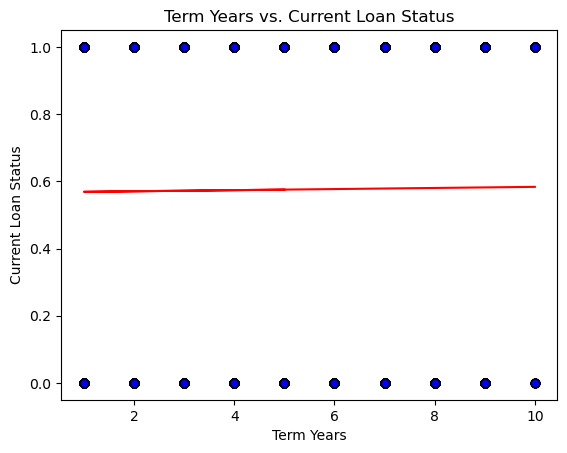

R squared: 0.000


<function __main__.plot_linear_regression(x_values, y_values, x_label, y_label, title, annotate_coords)>

In [47]:
# Function to create linear regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, annotate_coords):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    plt.scatter(x_values, y_values, edgecolors="k", facecolors="b", alpha=0.75, marker="o")
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, annotate_coords, fontsize=15, color="red")
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
    print(f"R squared: {rvalue**2:.3f}")

# Assuming 'cleaned_loan_df' is already defined and loaded
# Convert the relevant columns to float if they aren't already
cleaned_loan_df_new["term_years"] = cleaned_loan_df_new["term_years"].astype(float)
cleaned_loan_df_new["Current_loan_status"] = cleaned_loan_df_new["Current_loan_status"].map({"DEFAULT": 1, "NO DEFAULT": 0})
cleaned_loan_df_new["Current_loan_status"] = cleaned_loan_df_new["Current_loan_status"].astype(float)



# Extract the x and y values
x_values = cleaned_loan_df_new["term_years"]
y_values = cleaned_loan_df_new["Current_loan_status"]

# Create the scatter plot with linear regression
plot_linear_regression(x_values, y_values, "Term Years", "Current Loan Status", 
                       "Term Years vs. Current Loan Status", (10, 10))
plot_linear_regression

## Is there any relationship between year terms and the historical default?

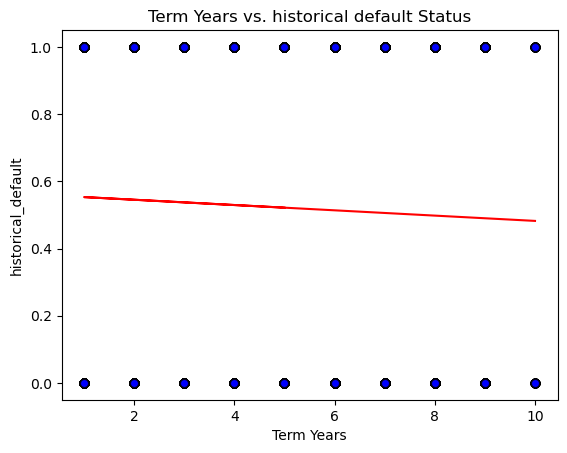

R squared: 0.002


<function __main__.plot_linear_regression(x_values, y_values, x_label, y_label, title, annotate_coords)>

In [48]:
# Term years vs. historical default scatter plot:
# Function to create linear regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, annotate_coords):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    plt.scatter(x_values, y_values, edgecolors="k", facecolors="b", alpha=0.75, marker="o")
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, annotate_coords, fontsize=15, color="red")
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
    print(f"R squared: {rvalue**2:.3f}")

# Assuming 'cleaned_loan_df' is already defined and loaded
# Convert the relevant columns to float if they aren't already
cleaned_loan_df_new["term_years"] = cleaned_loan_df_new["term_years"].astype(float)
cleaned_loan_df_new["historical_default"] = cleaned_loan_df_new["historical_default"].map({"Y": 1, "N": 0})
cleaned_loan_df_new["historical_default"] = cleaned_loan_df_new["historical_default"].astype(float)



# Extract the x and y values
x_values = cleaned_loan_df_new["term_years"]
y_values = cleaned_loan_df_new["historical_default"]

# Create the scatter plot with linear regression
plot_linear_regression(x_values, y_values, "Term Years", "historical_default", 
                       "Term Years vs. historical default Status", (10, 10))
plot_linear_regression

## Bounus Question: Does the loan grade and repayment capabilities of loan are correlated? what's the influence of customers' income between the two variable?

In [71]:
#loan grade and repayment capabilities (% to customer income) 
# Calculate loan repayment of each customer ID

# Function to calculate monthly repayment
def calculate_monthly_repayment(loan_amnt_pounds, loan_int_rate, term_years):
    monthly_int_rate = loan_int_rate / 12 / 100
    loan_term_months = term_years * 12
    monthly_repayment = loan_amnt_pounds * (monthly_int_rate / (1 - np.power((1 + monthly_int_rate), -loan_term_months)))
    return monthly_repayment

# Apply the function to each row in the DataFrame
cleaned_loan_df_new['monthly_repayment'] = cleaned_loan_df_new.apply(
    lambda row: calculate_monthly_repayment(row['loan_amnt(pounds)'], row['loan_int_rate'], row['term_years']),
    axis=1
)

# Display the updated DataFrame
cleaned_loan_df.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt(pounds),loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,22,59000,RENT,123.0,PERSONAL,C,35000.0,16.02,10,Y,3,DEFAULT
1,21,9600,OWN,5.0,EDUCATION,A,1000.0,11.14,1,NaN,2,NO DEFAULT
2,25,9600,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,N,3,DEFAULT
3,23,65500,RENT,4.0,MEDICAL,B,35000.0,15.23,10,N,2,DEFAULT
4,24,54400,RENT,8.0,MEDICAL,B,35000.0,14.27,10,Y,4,DEFAULT


In [72]:
cleaned_loan_df_new.dtypes

customer_age             int64
customer_income          int64
home_ownership          object
employment_duration    float64
loan_intent             object
loan_grade              object
loan_amnt(pounds)      float64
loan_int_rate          float64
term_years             float64
historical_default     float64
cred_hist_length         int64
Current_loan_status    float64
monthly_repayment      float64
dtype: object

In [73]:
# Calculate % loan repayment taken vs. customer income
cleaned_loan_df_new['customer_income'] = cleaned_loan_df_new['customer_income'].replace({'£': '', ',': ''}, regex=True).astype(float)

# Function to Calculate % loan repayment taken vs. customer income
def calculate_percentage_loan_to_income (customer_income, monthly_repayment):
    percentage_loan_to_income = monthly_repayment * 12 / customer_income * 100
    return percentage_loan_to_income

# Apply the function to each row in the DataFrame
cleaned_loan_df_new['percentage_loan_to_income'] = cleaned_loan_df_new.apply(
    lambda row: calculate_percentage_loan_to_income (row['customer_income'], row['monthly_repayment']),
    axis=1
)
# Display the updated DataFrame
cleaned_loan_df_new.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt(pounds),loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,monthly_repayment,percentage_loan_to_income
0,22,59000.0,RENT,123.0,PERSONAL,C,35000.0,16.02,10.0,1.0,3,1.0,586.732232,11.933537
2,25,9600.0,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5.0,0.0,3,1.0,124.776191,15.597024
3,23,65500.0,RENT,4.0,MEDICAL,B,35000.0,15.23,10.0,0.0,2,1.0,569.612203,10.435643
4,24,54400.0,RENT,8.0,MEDICAL,B,35000.0,14.27,10.0,1.0,4,1.0,549.128818,12.113136
5,21,9900.0,OWN,2.0,VENTURE,A,2500.0,7.14,1.0,0.0,2,1.0,216.478249,26.239788


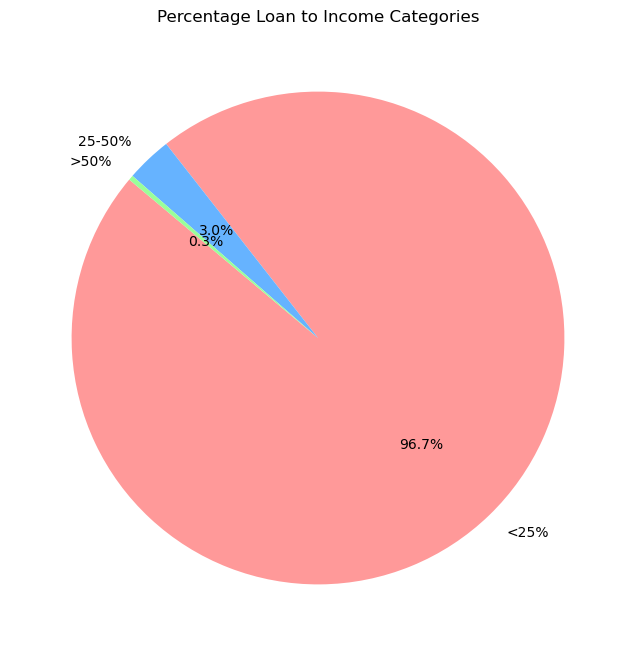

In [74]:
# show loan percentage to income pie chart

# Categorize the percentage loan to income
cleaned_loan_df_new['loan_to_income_category'] = pd.cut(
    cleaned_loan_df_new['percentage_loan_to_income'],
    bins=[0, 25, 50, np.inf],
    labels=['<25%', '25-50%', '>50%']
)

# Count the number of loans in each category
category_counts = cleaned_loan_df_new['loan_to_income_category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Percentage Loan to Income Categories')
plt.show()

# Ziyue Zhou (Jacky)'s part

## Question 2: Is there any relationship between the amount of loan and the customers' income?

In [49]:
# Calculate the summary statistics for income and amount of loan obtained:
print(f"The mean customer income is {round(cleaned_loan_df['customer_income'].mean(), 2)}.")
print(f"The median customer income is {round(cleaned_loan_df['customer_income'].median(), 2)}.")
print(f"The mode customer income is {st.mode(cleaned_loan_df['customer_income'], keepdims = False)}.")

print(f"The mean loan amount is {round(cleaned_loan_df['loan_amnt(pounds)'].mean(), 2)}.")
print(f"The median loan amount is {round(cleaned_loan_df['loan_amnt(pounds)'].median(), 2)}.")
print(f"The mode loan amount is {st.mode(cleaned_loan_df['loan_amnt(pounds)'], keepdims = False)}.")

The mean customer income is 66074.73.
The median customer income is 55000.0.
The mode customer income is ModeResult(mode=60000, count=1046).
The mean loan amount is 9724.99.
The median loan amount is 8000.0.
The mode loan amount is ModeResult(mode=10000.0, count=2664).


In [50]:
# Calculate the normal test score for income and loan amount to understand the distribution of two data.
print(st.normaltest(cleaned_loan_df['customer_income']))
print(st.normaltest(cleaned_loan_df['loan_amnt(pounds)']))

# Calculate the variance and standard deviation in two columns from the dataframe. Using ddof =1 as this is a sample dataset.
var_income = np.var(cleaned_loan_df['customer_income'], ddof = 1)
std_income = np.std(cleaned_loan_df['customer_income'], ddof = 1)
print(f"The variance of customer income from the data is {round(var_income,2)}, and the standard deviation is {round(std_income,2)}.")

var_loan = np.var(cleaned_loan_df['loan_amnt(pounds)'], ddof = 1)
std_income = np.std(cleaned_loan_df['loan_amnt(pounds)'], ddof = 1)
print(f"The variance of loan amount from the data is {round(var_income,2)}, and the standard deviation is {round(std_income,2)}.")

NormaltestResult(statistic=88247.84473145104, pvalue=0.0)
NormaltestResult(statistic=144428.92328511024, pvalue=0.0)
The variance of customer income from the data is 3842024514.77, and the standard deviation is 61984.07.
The variance of loan amount from the data is 3842024514.77, and the standard deviation is 21070.83.


In [51]:
# Calculating the Z-scores using scipy.stats for income and loan amount to see each data vary from the means:
z_score_income = st.zscore(cleaned_loan_df['customer_income'])
z_score_loan = st.zscore(cleaned_loan_df['loan_amnt(pounds)'])
print(f"the z score for customer income is {z_score_income}, and the score for loan amount is {z_score_loan}.")

the z score for customer income is 0       -0.114140
1       -0.911131
2       -0.911131
3       -0.009272
4       -0.188353
           ...   
32575   -0.210940
32576    0.869999
32577    0.160129
32578    1.354002
32579   -0.388408
Name: customer_income, Length: 32580, dtype: float64, and the score for loan amount is 0        1.199544
1       -0.414086
2       -0.200517
3        1.199544
4        1.199544
           ...   
32575   -0.186279
32576    0.374932
32577    1.199544
32578    0.250350
32579   -0.154244
Name: loan_amnt(pounds), Length: 32580, dtype: float64.


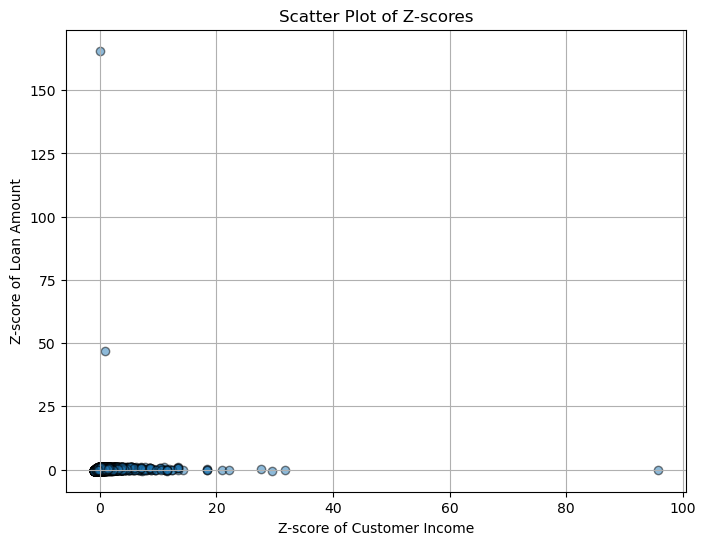

In [52]:
# Scatter plot of Z-scores for customer income and loan amount
plt.figure(figsize=(8, 6))
plt.scatter(z_score_income, z_score_loan, alpha=0.5, edgecolors='k')
plt.title('Scatter Plot of Z-scores')
plt.xlabel('Z-score of Customer Income')
plt.ylabel('Z-score of Loan Amount')
plt.grid()
plt.show()

In [54]:
# Check the skewness of the income data and loan amount data:
income_skewness = st.skew(cleaned_loan_df['customer_income'])
loan_amount_skewness = st.skew(cleaned_loan_df['loan_amnt(pounds)'])
print(f"the skewness of income data from the csv file is {round(income_skewness, 2)}, and the loan amount is {round(loan_amount_skewness, 2)}.")

the skewness of income data from the csv file is 32.86, and the loan amount is 142.73.


## Analysis from all the statistical calculation for the customer incomes and the amount of loans they obtained:

* From the calculations above, we can understand that in both the income and loan data, there are vast amount of values are below the mean values. From the normal tests that the p-value obtained we can see that 0.0 p-value is less than any common significance (0.05, 0.01, 0.001). This indicates that for both income and loan amount, we can reject the null hypothesis of the data follows a normal distribution. Also, from the variance and standard deviation value obtained, we can conclude that both income and loans data are very disperse. Which means all data are far away from each other. By examinig the data above, both income and loan are not normally distributed, infact, from the z-score test and the scatter plot with the positive skewness score. Both income and loan amount are significantly right skewed. Due to there are many low values from the data. Hence, the next step is to trim out the extreme values then apply further analysis and plotting to show the trends. 

In [55]:
# Removing the outliers / extreme values from income and loan amount:
# Calculate iqr for customer income and loan amount
q1_income = cleaned_loan_df['customer_income'].quantile(0.25)
q3_income = cleaned_loan_df['customer_income'].quantile(0.75)
iqr_income = q3_income - q1_income

q1_loan = cleaned_loan_df['loan_amnt(pounds)'].quantile(0.25)
q3_loan = cleaned_loan_df['loan_amnt(pounds)'].quantile(0.75)
iqr_loan = q3_loan - q1_loan

# get the upper and lower bounds for outliers
lower_bound_income = q1_income - 1.5 * iqr_income
upper_bound_income = q3_income + 1.5 * iqr_income

lower_bound_loan = q1_loan - 1.5 * iqr_loan
upper_bound_loan = q3_loan + 1.5 * iqr_loan
print(f"The 25% of the income is {round(q1_income, 2)}, and the 75% is {round(q3_income, 2)}. The inter quantile range is {round(iqr_income, 2)}.")
print(f"The 25% of the loan amount is {round(q1_loan, 2)}, and the 75% is {round(q3_loan, 2)}. The inter quantile range is {round(iqr_loan, 2)}.")
print(f"The lower bound of income is {round(lower_bound_income, 2)}, the upper bound is {round(upper_bound_income, 2)}.")
print(f"The lower bound of loan is {round(lower_bound_loan, 2)}, the upper bound is {round(upper_bound_income, 2)}.")

The 25% of the income is 38500.0, and the 75% is 79200.0. The inter quantile range is 40700.0.
The 25% of the loan amount is 5000.0, and the 75% is 12200.0. The inter quantile range is 7200.0.
The lower bound of income is -22550.0, the upper bound is 140250.0.
The lower bound of loan is -5800.0, the upper bound is 140250.0.


* Here we have an interesting finding, when calculating the lower bound of customer income and loan amount, we get the negative number. This indicates that in the data there are significant spread in the lower 25% of both income and loan amount respectively. Thus this could mean there is a wid range of low incomes and loan amounts exits in the collection of data that affects the lower boundaries.


In [56]:
# Remove outliers and show the newly cleaned df:
cleaned_df_new = cleaned_loan_df[
    (cleaned_loan_df['customer_income'] >= lower_bound_income) & \
    (cleaned_loan_df['customer_income'] <= upper_bound_income) & \
    (cleaned_loan_df['loan_amnt(pounds)'] >= lower_bound_loan) & \
    (cleaned_loan_df['loan_amnt(pounds)'] <= upper_bound_loan)
]

cleaned_df_new

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt(pounds),loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
1,21,9600,OWN,5.0,EDUCATION,A,1000.0,11.14,1,NaN,2,NO DEFAULT
2,25,9600,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,N,3,DEFAULT
5,21,9900,OWN,2.0,VENTURE,A,2500.0,7.14,1,N,2,DEFAULT
9,21,10000,OWN,6.0,VENTURE,C,1600.0,14.74,1,N,3,DEFAULT
11,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500.0,8.63,1,N,2,DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,52,65004,RENT,4.0,PERSONAL,D,20000.0,15.58,2,Y,19,DEFAULT
32574,52,64500,RENT,0.0,EDUCATION,B,5000.0,11.26,2,NaN,20,NO DEFAULT
32575,57,53000,MORTGAGE,1.0,PERSONAL,C,5800.0,13.16,7,NaN,30,NO DEFAULT
32576,54,120000,MORTGAGE,4.0,PERSONAL,A,17625.0,7.49,4,NaN,19,NO DEFAULT


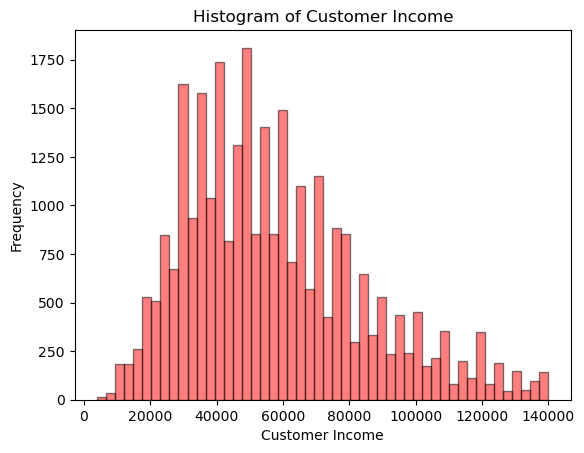

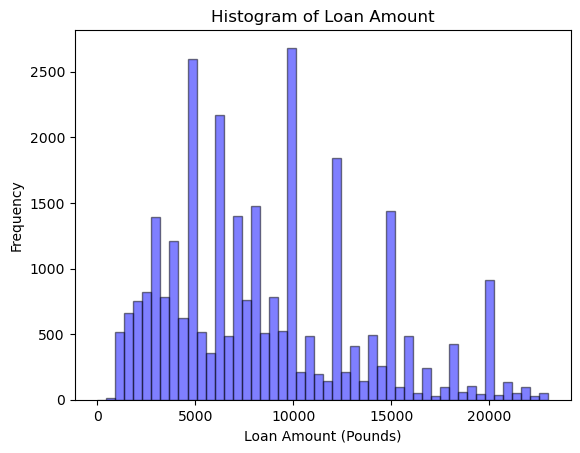

In [57]:
# Plot histogram for customer income:
plt.hist(cleaned_df_new['customer_income'], bins=50, edgecolor='k', color='r', alpha=0.5) # set 50 hists to show the frequency.
plt.xlabel('Customer Income')
plt.ylabel('Frequency')
plt.title('Histogram of Customer Income')
plt.show()

# Plot histogram for loan amount:
plt.hist(cleaned_df_new['loan_amnt(pounds)'], bins=50, edgecolor='k', color='b', alpha=0.5) # set 50 hists to show the frequency.
plt.xlabel('Loan Amount (Pounds)')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Amount')
plt.show()

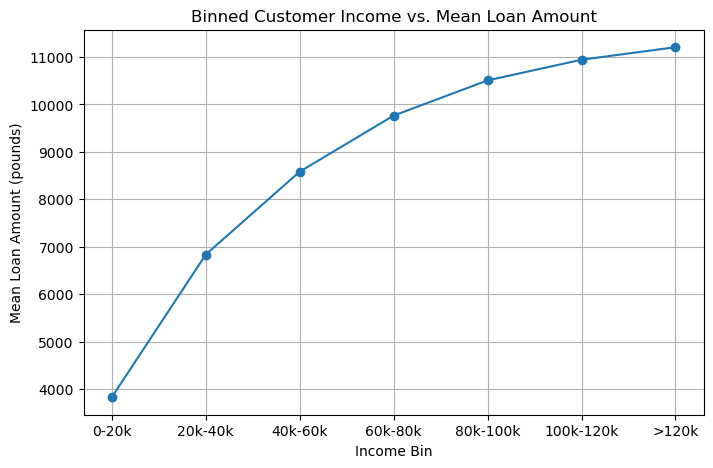

In [58]:
# Define the bins for bucketing the income range from the column after removing the outliers.
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000]
labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '>120k']

# Bining the customer_income data:
cleaned_df_new['income_bin'] = pd.cut(cleaned_df_new['customer_income'], bins=bins, labels=labels)

# Calculate the mean loan amount for each income bin as y axis value:
bin_means = cleaned_df_new.groupby('income_bin')['loan_amnt(pounds)'].mean().reset_index()

# Plot the binned data:
plt.figure(figsize=(8, 5))
plt.plot(bin_means['income_bin'], bin_means['loan_amnt(pounds)'], marker = 'o')
plt.title('Binned Customer Income vs. Mean Loan Amount')
plt.xlabel('Income Bin')
plt.ylabel('Mean Loan Amount (pounds)')
plt.grid()
plt.show()

<Figure size 2000x1400 with 0 Axes>

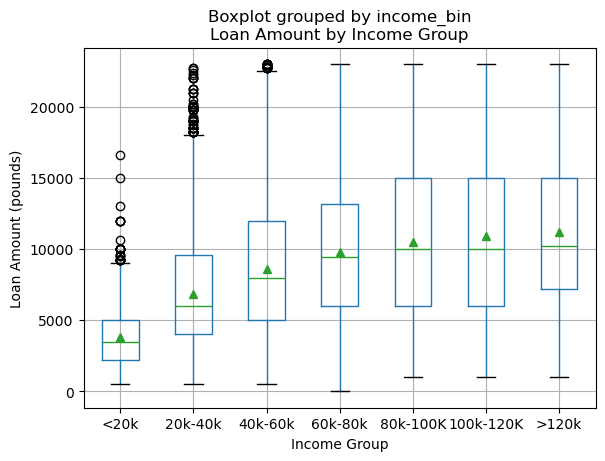

In [59]:
# Create income bins
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000]
labels = ['<20k', '20k-40k', '40k-60k', '60k-80k', '80k-100K','100k-120K', '>120k']
cleaned_df_new['income_bin'] = pd.cut(cleaned_df_new['customer_income'], bins=bins, labels=labels)
# performing the box-whisker plot to examine:
plt.figure(figsize=(20, 14))
cleaned_df_new.boxplot(column='loan_amnt(pounds)', by='income_bin', showmeans=True)
plt.title('Loan Amount by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Loan Amount (pounds)')
plt.show()

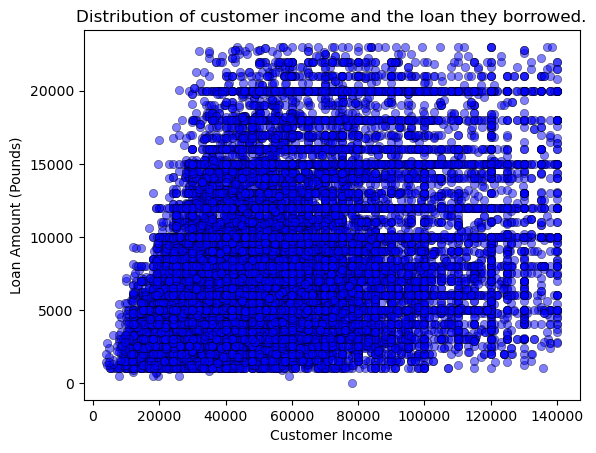

In [60]:
#Perform scatter plot on customer_income and the loan amount:
plt.scatter(cleaned_df_new['customer_income'], cleaned_df_new['loan_amnt(pounds)'], facecolors='blue', alpha = 0.5, edgecolors='black', linewidth=0.5)

# Adding labels and title
plt.xlabel('Customer Income')
plt.ylabel('Loan Amount (Pounds)')
plt.title('Distribution of customer income and the loan they borrowed.')
plt.show()

In [61]:
# Calculate Pearson correlation between income and loan amount.
pearson_corr, pearson_p_value = st.pearsonr(cleaned_df_new['customer_income'], cleaned_df_new['loan_amnt(pounds)'])
print(f"Pearson Correlation: {pearson_corr}, p-value: {pearson_p_value}")

Pearson Correlation: 0.3275049302859736, p-value: 0.0


### Null Hypothesis (H0): income has no affect on the amount of loan people will get.

### Alternative Hypothesis (H1): customers' income level does not impact the amount of loan they get.

In [62]:
# Performing the independent T-test between customer income and the amount of loan:
# Extract the income and loan amount columns
income = cleaned_df_new['customer_income']
loan_amount = cleaned_df_new['loan_amnt(pounds)']

# Perform an independent t-test
t_stat, p_value = st.ttest_ind(income, loan_amount)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 308.5595288624219, P-value: 0.0


* Hence from the P-value obtained by performing the T-test, we can say that we are able to reject the null hypothesis that the customer income has influence on the amount of loan they borrowed.

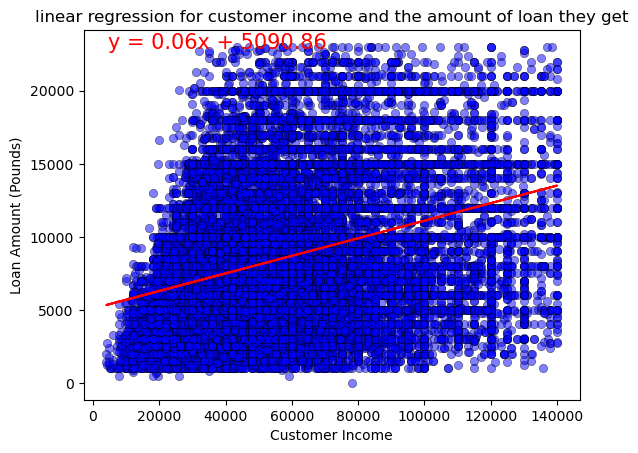

the r-squared value is 0.11.


In [63]:
# Perform linear regression on the scatter plot above:
x = cleaned_df_new['customer_income']
y = cleaned_df_new['loan_amnt(pounds)']
slope, intercept, rvalue, pvalue, stderr = st.linregress(x, y)
regression_value = slope * x + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y, facecolors='blue', alpha = 0.5, edgecolors='black', linewidth=0.5)
plt.plot(x, regression_value, 'r-')
plt.annotate(line_equation, (0.05,0.95), xycoords='axes fraction', fontsize=15, color='red')
plt.xlabel('Customer Income')
plt.ylabel('Loan Amount (Pounds)')
plt.title('linear regression for customer income and the amount of loan they get')
plt.show()
print(f"the r-squared value is {round(rvalue**2, 2)}.")

## Analysis of the graphs above:

* So from the plottings and the analysis above. We can see that after remove the extreme values, the most frequent occured income appears between 40k and 60k, and the most frequent loan amount is between 5000 to 10000. Also, from the binned customer income groups and the mean of the loans line graph. We can see that there is an evident accelerating trends that as the income increase, the more loan amount there are. From the box plot, however, the outliers are mainly appears in 20k to 40k, followed by less than 20K. Which means there are actually over the upper boundary amount of loan borrowed from the corresponding customer income groups.

* From the scatter plot, we can see that tapered shape of data distributed accross the plot, so the most dense part of the scatters condense in the left lower cornner of the plot, as income increase, there are more sparse scatters in the higher loan amount. Moreover, from the linear regression analysis. the slope is 0.06 which means for per income increase the amount of loan rise in 6% on average, and the line showed positive correlation bewteen income and loan amount in general. However, from the 0.11 R-sqaured value, and the pearson r value is 0.39, we can also interperate that there are lowe explaination power between the increase of the income and loan amount, but the positive correlation presents. This may suggest that other factors influencing the loan amount as well, which solely the income is not the only determinant factor, which further indicate the relationship is weak. 

## Question 5: Does the home ownership affect customers' loan grade?

### Null Hypothesis (H0): There are no asscociations between loan grade and home ownership for customers.

### Alternative Hypothesis (H1): Customers' home ownership can impact the loan grade.

In [64]:
cleaned_df_new

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt(pounds),loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,income_bin
1,21,9600,OWN,5.0,EDUCATION,A,1000.0,11.14,1,NaN,2,NO DEFAULT,<20k
2,25,9600,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,N,3,DEFAULT,<20k
5,21,9900,OWN,2.0,VENTURE,A,2500.0,7.14,1,N,2,DEFAULT,<20k
9,21,10000,OWN,6.0,VENTURE,C,1600.0,14.74,1,N,3,DEFAULT,<20k
11,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500.0,8.63,1,N,2,DEFAULT,<20k
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32573,52,65004,RENT,4.0,PERSONAL,D,20000.0,15.58,2,Y,19,DEFAULT,60k-80k
32574,52,64500,RENT,0.0,EDUCATION,B,5000.0,11.26,2,NaN,20,NO DEFAULT,60k-80k
32575,57,53000,MORTGAGE,1.0,PERSONAL,C,5800.0,13.16,7,NaN,30,NO DEFAULT,40k-60k
32576,54,120000,MORTGAGE,4.0,PERSONAL,A,17625.0,7.49,4,NaN,19,NO DEFAULT,100k-120K


In [65]:
loan_grade_group = cleaned_df_new.groupby('loan_grade').size()
loan_grade_group

loan_grade
A    14577
B     8335
C     4461
D     2204
E      212
dtype: int64

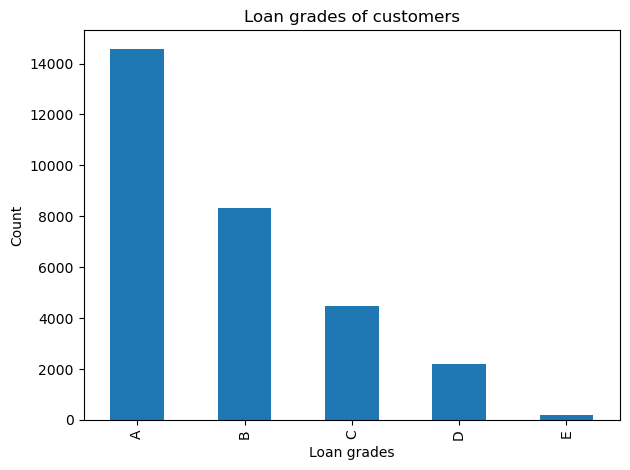

In [66]:
chart = loan_grade_group.plot(kind = 'bar', title = 'Loan grades of customers')
chart.set_xlabel('Loan grades')
chart.set_ylabel('Count')
plt.tight_layout()
plt.show()

In [67]:
grouped_df = cleaned_df_new.groupby(['home_ownership', 'loan_grade']).size().unstack()
grouped_df

loan_grade,A,B,C,D,E
home_ownership,,,,,
MORTGAGE,6914.0,2587.0,1444.0,684.0,73.0
OTHER,33.0,34.0,17.0,12.0,NaN
OWN,1275.0,570.0,353.0,168.0,14.0
RENT,6355.0,5144.0,2647.0,1340.0,125.0


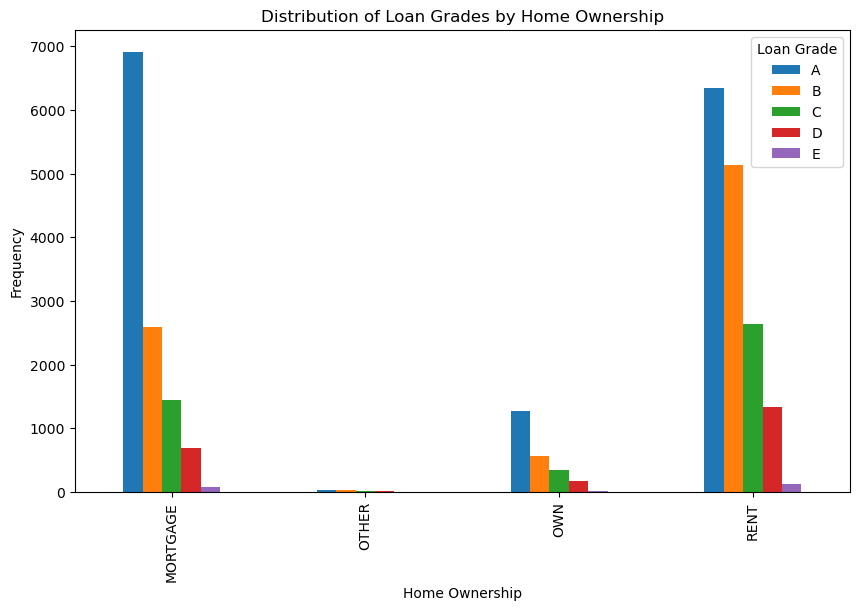

In [68]:
# Plotting the frequency distribution
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Loan Grades by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.legend(title='Loan Grade')
plt.show()

In [69]:
# Perfrom Chi-square test between house ownership and their loan grade:
#but here we need to use chi2 contigency test (crosstab) instead of simple chi2, becasue we want to know the connections
#between two categorial variables and check if the p-value between two variables are statistically significant.
from scipy.stats import chi2_contingency

# Due to there is an NaN in the grouped_df, we need to first remove this before applying chi2_contigency test:
grouped_df['E'] = grouped_df['E'].fillna(0)

chi2, p_value, dof, expectation = st.chi2_contingency(grouped_df)
print(f'expectation value is {expectation}.')
print(f'Chi-Square Statistic: {chi2}.')
print(f'P-value: {p_value}.')

expectation value is [[5.72627661e+03 3.27423445e+03 1.75241270e+03 8.65796368e+02
  8.32798684e+01]
 [4.69768035e+01 2.68609218e+01 1.43763134e+01 7.10275605e+00
  6.83205210e-01]
 [1.16463325e+03 6.65927020e+02 3.56412770e+02 1.76089160e+02
  1.69377958e+01]
 [7.63911333e+03 4.36797761e+03 2.33779821e+03 1.15501172e+03
  1.11099131e+02]].
Chi-Square Statistic: 946.0920878043238.
P-value: 7.221946078059247e-195.


* The extremely small value of the P is significnatly less than the common set P boundary of 0.05, which means we can reject the null hypothesis that the home ownership is associate with the loan grade.
* Also, from the chi-square value we can see that a great difference the observed and expected frequencies, suggesting a strong relationship between two variables.

In [70]:
# Create a crosstab
crosstab = pd.crosstab(cleaned_df_new['home_ownership'], cleaned_df_new['loan_grade'], margins=True, normalize='index')

print(crosstab)

loan_grade             A         B         C         D         E
home_ownership                                                  
MORTGAGE        0.590839  0.221073  0.123398  0.058452  0.006238
OTHER           0.343750  0.354167  0.177083  0.125000  0.000000
OWN             0.535714  0.239496  0.148319  0.070588  0.005882
RENT            0.407085  0.329511  0.169560  0.085837  0.008007
All             0.489342  0.279801  0.149753  0.073987  0.007117


### Analysis for the question 5:

* So from the graphs and statistical tests performed above. We can gained insight that the most of loan grades are A, then in the grouped table we can see that the mortgage ownership there are the most grade A, followed by rent, then is the own. However the rent ownership does have the highest loan grade of B. Moreover, from the overall counting, the rent ownership also has the most lower grade compared with others, we can visualise these finding from the grouped bar chart. 

* Additionally, from the Chi2 test, we gained the p value of a very small number which is significantly less than the 0.05. In this case, we can successfully reject the null hypothesis and conclude that the homeownership does have impact on loan grading. This can be further explored by the cross table obtained. However, due to the large chi2 value, this means the casual relationship is not linear. This indictes other factors may also participate with the different loan grade.

Rivas Karki's part

* Please complete your analysis below with plotting. Adding more cells if you need:

Jordan Chia's part

* Please complete your analysis below with plotting. Adding more cells if you need: